In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [8]:
df = pd.read_excel('C:/Users/Nivea Helena/Documents/developer/ciencia de dados/projetos_ds/Data_cleaning/Earlwood_Air_Data_17_18.xls/Earlwood_Air_Data_17_18.xls')

In [9]:
df.count()

Date                                        8784
Time                                        8784
EARLWOOD WDR 1h average [°]                 8759
EARLWOOD TEMP 1h average [°C]               8761
EARLWOOD WSP 1h average [m/s]               8759
EARLWOOD NO 1h average [pphm]               8295
EARLWOOD NO2 1h average [pphm]              8295
EARLWOOD CO 1h average [ppm]                   0
EARLWOOD OZONE 1h average [pphm]            7918
EARLWOOD OZONE 4h rolling average [pphm]    8216
EARLWOOD PM10 1h average [µg/m³]            8692
EARLWOOD PM2.5 1h average [µg/m³]           8614
EARLWOOD HUMID 1h average [%]               8762
EARLWOOD SD1 1h average [°]                 8759
EARLWOOD CO 8h rolling average [ppm]           0
dtype: int64

In [10]:
df.columns

Index(['Date', 'Time', 'EARLWOOD WDR 1h average [°]',
       'EARLWOOD TEMP 1h average [°C]', 'EARLWOOD WSP 1h average [m/s]',
       'EARLWOOD NO 1h average [pphm]', 'EARLWOOD NO2 1h average [pphm]',
       'EARLWOOD CO 1h average [ppm]', 'EARLWOOD OZONE 1h average [pphm]',
       'EARLWOOD OZONE 4h rolling average [pphm]',
       'EARLWOOD PM10 1h average [µg/m³]', 'EARLWOOD PM2.5 1h average [µg/m³]',
       'EARLWOOD HUMID 1h average [%]', 'EARLWOOD SD1 1h average [°]',
       'EARLWOOD CO 8h rolling average [ppm]'],
      dtype='object')

In [11]:
df = df.rename(columns={'Date': 'Date', 'Time': 'Time', 'EARLWOOD WDR 1h average [°]': 'WDR',
       'EARLWOOD TEMP 1h average [°C]': 'TEMP', 'EARLWOOD WSP 1h average [m/s]': 'WSP',
       'EARLWOOD NO 1h average [pphm]': 'NO', 'EARLWOOD NO2 1h average [pphm]': 'NO2',
       'EARLWOOD CO 1h average [ppm]': 'CO', 'EARLWOOD OZONE 1h average [pphm]': 'OZONE',
       'EARLWOOD OZONE 4h rolling average [pphm]': 'OZONE_4',
       'EARLWOOD PM10 1h average [µg/m³]': 'PM10', 'EARLWOOD PM2.5 1h average [µg/m³]': 'PM2.5',
       'EARLWOOD HUMID 1h average [%]': 'HUMID', 'EARLWOOD SD1 1h average [°]': 'SD1',
       'EARLWOOD CO 8h rolling average [ppm]': 'CO_8'})

In [12]:
df = df.fillna(value=0)

In [13]:
df.head()

,Date,Time,WDR,TEMP,WSP,NO,NO2,CO,OZONE,OZONE_4,PM10,PM2.5,HUMID,SD1,CO_8
0,01/01/2017,01:00,152.3,22.6,0.4,0.0,0.4,0.0,2.0,2.1,23.6,7.0,87.2,49.01,0.0
1,01/01/2017,02:00,134.0,22.6,0.3,0.0,0.0,0.0,0.0,2.2,21.0,6.6,87.2,46.56,0.0
2,01/01/2017,03:00,132.2,22.6,0.3,0.0,0.6,0.0,1.7,2.0,20.0,7.2,87.0,47.40,0.0
3,01/01/2017,04:00,125.8,22.7,0.2,0.0,0.5,0.0,1.7,1.8,21.4,7.1,87.2,53.70,0.0
4,01/01/2017,05:00,107.9,22.8,0.6,0.0,0.3,0.0,2.1,1.8,21.5,4.3,86.8,41.65,0.0


In [14]:
#df = df.drop_duplicates()

In [15]:
df.count()

Date       8784
Time       8784
WDR        8784
TEMP       8784
WSP        8784
NO         8784
NO2        8784
CO         8784
OZONE      8784
OZONE_4    8784
PM10       8784
PM2.5      8784
HUMID      8784
SD1        8784
CO_8       8784
dtype: int64

<AxesSubplot:>

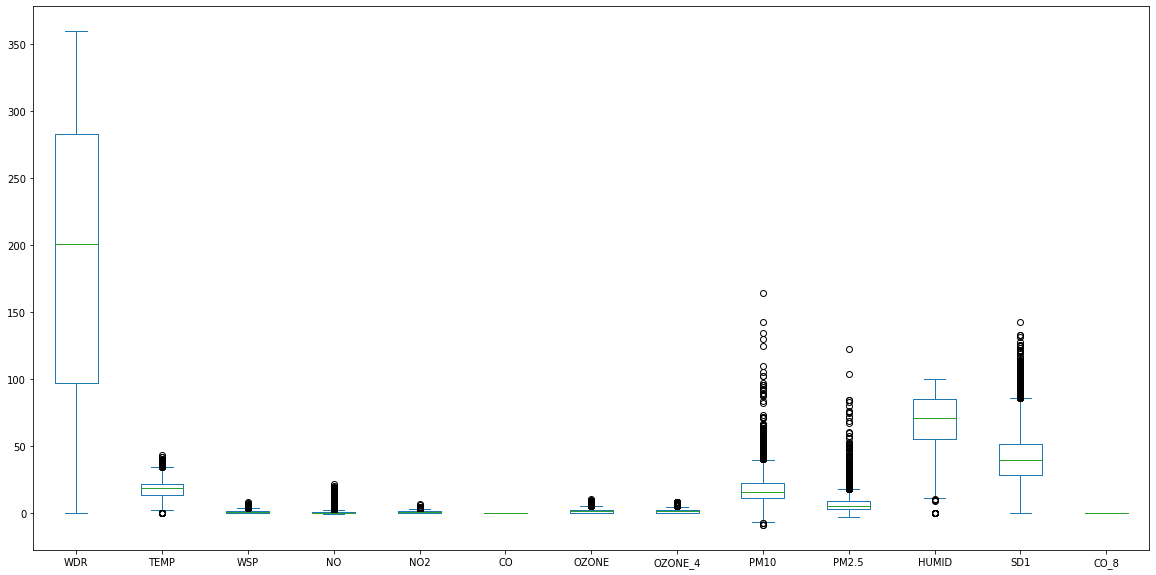

In [16]:
df.plot.box(figsize = (20,10))

In [22]:
from scipy.stats import zscore

In [23]:
def zscore_filter_target(dados, target, graus = 3, axis=0, ddof=0, nan_policy='propagate'):
  # exemplo
  '''
  dados = dataset em formato pandas.
  target = coluna de identificação da variável target. Apenas se forem classes.
  graus = numero de graus de liberdade que o modelo assumirá
  retorno = identificação de outliers dentro do conjunto de dados  e os elimina do dataset.
  '''
  tg_list = dados[target].unique() #* verificar as classes distintas
  name_col = list(dados.drop(target, axis=1)) #* selecionar a coluna
  filtro = dados.columns
  graus = graus
  df_retorno = []
  for values, tg in enumerate(tg_list):
    subset = dados[dados[target] == tg] # quebar o dataset por classe em outros df
    for variavel in name_col:
      X = np.array(subset[variavel])
      out = zscore(X, axis=axis, ddof=ddof, nan_policy=nan_policy)
      X = np.reshape(X, (len(X), 1))
      subset[f'{variavel}_outlier'] = out
      print(subset)
    df_retorno.append(subset)
  retorno = pd.concat(df_retorno)
  retorno = retorno[retorno[f'{variavel}_outlier'] <= graus]
  retorno = retorno[retorno[f'{variavel}_outlier'] >= ((graus)* -1)]
  retorno = retorno.filter(filtro)
  return retorno

In [154]:
from cgi import test


def zscore_filter(dados, graus = 3, axis=0, ddof=0, nan_policy='propagate'):
  # exemplo
  '''
  dados = dataset em formato pandas.
  target = coluna de identificação da variável target. Apenas se forem classes.
  graus = numero de graus de liberdade que o modelo assumirá
  retorno = identificação de outliers dentro do conjunto de dados  e os elimina do dataset.
  '''
  #name_col = list(dados)
  filtro = dados.columns
  graus = graus
  df_retorno = []
  for variavel in filtro:
    subset = dados[variavel]
    X = np.array(subset)
    out = zscore(X, axis=axis, ddof=ddof, nan_policy=nan_policy)
    out = list(out)
    #X = np.reshape(X, (len(X), 1))
    #out = np.reshape(out, (1, len(out)))
    #[f'{variavel}_zscore'] = out
    #df_retorno.append(list(X))
    #df_retorno.append(list(out))
    subset = subset.insert(len(filtro)+1, f'{variavel}_zscore', out, allow_duplicates=False)
    
    #
    #subset[f'{variavel}_outlier'] = out
    
  #df_retorno.append(subset)
  #retorno = pd.DataFrame(df_retorno)
  #retorno = retorno[retorno[f'{variavel}_outlier'] <= graus]
  #retorno = retorno[retorno[f'{variavel}_outlier'] >= ((graus)* -1)]
  #retorno = retorno.filter(filtro)
  #return subset

In [155]:
teste = zscore_filter(df, graus = 3)

AttributeError: 'Series' object has no attribute 'insert'

In [149]:
teste